In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

[]

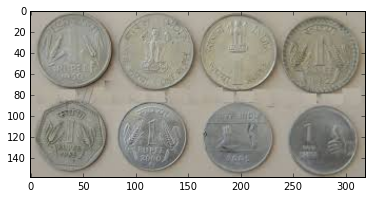

In [15]:
imName = ("test4.jpg")

# Read the image
img = cv.imread(imName, cv.IMREAD_UNCHANGED)
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.imread(imName, 0)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.imshow(RGB_img)
plt.plot()

[]

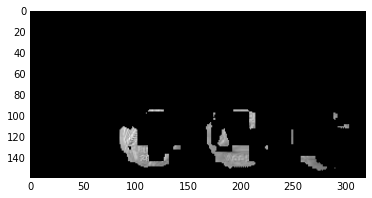

In [16]:
# HSV space segmentation
silverMin = np.array([80, 0, 0],np.uint8)
silverMax = np.array([150, 100, 255],np.uint8)

threshImg = cv.inRange(hsv, silverMin, silverMax)

res = cv.bitwise_and(RGB_img, RGB_img, mask=threshImg)

res = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
plt.imshow(res, cmap='gray')
plt.plot()

[]

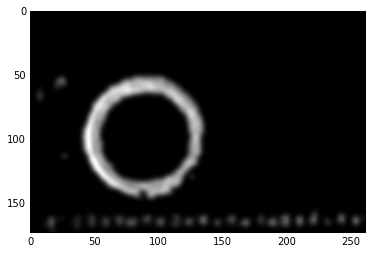

In [10]:
# Blur it
blur = cv.GaussianBlur(res, (11, 11), 0)
#or median blur?

plt.imshow(blur, cmap='gray')
plt.plot()

[]

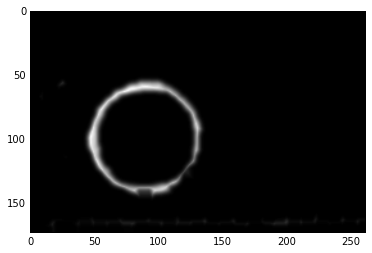

In [11]:
# Make eroding
kernel = np.ones((4, 4), np.uint8)
#closing = cv.morphologyEx(blur, cv.MORPH_CLOSE, kernel, iterations=2)
eroded = cv.erode(blur,kernel,iterations = 2)
plt.imshow(eroded, cmap='gray')
plt.plot()

In [ ]:
# Threshold it
thresh = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
cv.THRESH_BINARY_INV, 11, 1)

1


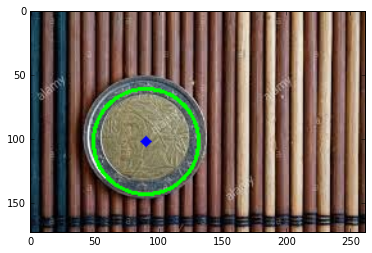

(90, 102, 41)


In [12]:
# Hough circle
circles = cv.HoughCircles(eroded,cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)

print(len(circles))

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  # draw the outer circle
  cv.circle(RGB_img,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv.circle(RGB_img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(RGB_img)
plt.show()


print(i[0],i[1],i[2])

In [ ]:
# Contours
cont_img = closing.copy()
im2, contours, hierarchy = cv.findContours(cont_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(len(contours))

#print(contours)

for cnt in contours:
  area = cv.contourArea(cnt)
  #if area < 2000 or area > 4000:
  #  continue
  if len(cnt) < 5: 
    continue
  ellipse = cv.fitEllipse(cnt) 

  #cv.ellipse(img, ellipse, (0,255,0), 2) 

In [ ]:


cv.imshow("final result", img)
cv.imshow("eroded", closing)
cv.imshow('image',thresh)
cv.waitKey(0)
cv.destroyAllWindows()